In [78]:
#imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [79]:
#Sklearn imports 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [80]:
#Load dataset
df_vpn1 = pd.read_json('vpn1.json')
df_vpn2 = pd.read_json('vpn2.json')
df_vpn3 = pd.read_json('vpn3.json')

In [22]:
df_vpn1

,id,x_packets
0,DdpYMBdSWcwU7kN7NWjWPQ,"[{'bytes': 183, 'direction': 1, 'packets_numbe..."
1,Kn77sEDYmf3b24SzkpNdTX,"[{'bytes': 183, 'direction': 1, 'packets_numbe..."
2,8ukX9v9TPnG9bD53ywPcCc,"[{'bytes': 183, 'direction': 1, 'packets_numbe..."
3,DTv386KYwKbNzSPmdKbWfd,"[{'bytes': 4270, 'direction': 1, 'packets_numb..."
4,GVL5ccqi8ntQn3cBdGaAMi,"[{'bytes': 183, 'direction': 1, 'packets_numbe..."
...,...,...
84,TZREv9MUbWGVHy63m5BKxL,"[{'bytes': 183, 'direction': 1, 'packets_numbe..."
85,jeCSwCFRYStKLPyxmxawtY,"[{'bytes': 183, 'direction': 1, 'packets_numbe..."
86,B2DX6cCsDgqJPddS7ZFFYB,"[{'bytes': 183, 'direction': 1, 'packets_numbe..."
87,b7sLj8yoE6iATN6xjrFSRx,"[{'bytes': 183, 'direction': -1, 'packets_numb..."


In [17]:
def extracting_data(df,target):
    
    m_bytes = []
    m_time = []
    m_packet = []
    m_d_forward = []
    m_d_backward = []
    
    
    for i in range(len(df['x_packets'])):
        packets = df['x_packets'][i]
        l_id = []
        l_bits = []
        l_direction = []
        l_packets_number = []
        l_timestamp = []
        l_target = []
    
        for packet in packets:
            l_bits.append(packet['bytes'])
            l_direction.append(packet['direction'])
            l_packets_number.append(packet['packets_number'])
            l_timestamp.append(packet['timestamp'])
            l_id.append(df['id'][i])
            l_target.append(target)
            
        m_bytes.append(np.mean(l_bits))
        m_time.append(np.mean(l_timestamp))
        m_packet.append(np.mean(l_timestamp))
        m_d_forward.append(l_direction.count(1))
        m_d_backward.append(l_direction.count(-1))
        
        
        
        
            
    return m_bytes,m_time,m_packet,m_d_forward,m_d_backward
    

In [23]:
#formated vp1 dataframe
m_bytes,m_time,m_packet,m_d_forward,m_d_backward = extracting_data(df_vpn1,'vpn1')
formated_df_vp1 = pd.DataFrame(list(zip(df_vpn1['id'],m_bytes,m_time,m_packet,m_d_forward,m_d_backward)), columns =[ 'id','m_bytes','m_timestamp','m_packet','m_d_forward','m_d_backward'])

#formated vpn2 dataframe
m_bytes,m_time,m_packet,m_d_forward,m_d_backward = extracting_data(df_vpn2,'vpn2')
formated_df_vp2 = pd.DataFrame(list(zip(df_vpn2['id'],m_bytes,m_time,m_packet,m_d_forward,m_d_backward)), columns =['id','m_bytes','m_timestamp','m_packet','m_d_forward','m_d_backward'])
#formated vpn3 dataframe
m_bytes,m_time,m_packet,m_d_forward,m_d_backward = extracting_data(df_vpn3,'vpn3')
formated_df_vp3 = pd.DataFrame(list(zip(df_vpn3['id'],m_bytes,m_time,m_packet,m_d_forward,m_d_backward)), columns =['id','m_bytes','m_timestamp','m_packet','m_d_forward','m_d_backward'])

In [28]:
formated_df_vp1['label'] = 'vpn1'
formated_df_vp2['label'] = 'vpn2'
formated_df_vp3['label'] = 'vpn3'

In [31]:
df = pd.concat([formated_df_vp1,formated_df_vp2,formated_df_vp3]).reset_index()
df.drop('index',axis=1, inplace=True)
df.head()

,id,m_bytes,m_timestamp,m_packet,m_d_forward,m_d_backward,label
0,DdpYMBdSWcwU7kN7NWjWPQ,1151.352408,14.085401,14.085401,5787,10989,vpn1
1,Kn77sEDYmf3b24SzkpNdTX,1501.040829,7.022014,7.022014,2322,5589,vpn1
2,8ukX9v9TPnG9bD53ywPcCc,1457.452513,3.397744,3.397744,1650,3762,vpn1
3,DTv386KYwKbNzSPmdKbWfd,1457.785693,5.448121,5.448121,4697,1901,vpn1
4,GVL5ccqi8ntQn3cBdGaAMi,1517.751738,7.805657,7.805657,2796,7274,vpn1


In [33]:
df['label'].value_counts()

vpn2    171
vpn3    164
vpn1     89
Name: label, dtype: int64

In [34]:
df.columns

Index(['id', 'm_bytes', 'm_timestamp', 'm_packet', 'm_d_forward',
       'm_d_backward', 'label'],
      dtype='object')

In [35]:
#Preprocessing features
numerical_features = ['m_bytes', 'm_timestamp', 'm_packet', 'm_d_forward','m_d_backward']
categorical_feautures = ['id']

numerical_pipline = make_pipeline(StandardScaler())
categorical_pipline = make_pipeline(OrdinalEncoder(unknown_value=-1,handle_unknown='use_encoded_value'),StandardScaler())

preprocessing = make_column_transformer((numerical_pipline,numerical_features),(categorical_pipline,categorical_feautures))

In [37]:
#Split data feautures and target 
features = ['id','m_bytes', 'm_timestamp', 'm_packet', 'm_d_forward','m_d_backward']
target = ['label']

X = df[features]
y = df[target]

In [38]:
X_transformed = preprocessing.fit_transform(X)


In [39]:
X_transformed

array([[ 0.74859103,  1.43318082,  1.43318082,  0.69154281,  0.99012036,
        -0.82109241],
       [ 1.7688604 ,  0.34812432,  0.34812432, -0.15088407,  0.10850397,
        -0.34722813],
       [ 1.64168483, -0.20862535, -0.20862535, -0.31426383, -0.18977625,
        -1.20508587],
       ...,
       [-0.10120171, -0.21488618, -0.21488618, -0.33565879,  0.99044688,
        -0.10212592],
       [-0.93008748, -0.73057666, -0.73057666, -0.71517636, -0.803969  ,
         0.81292233],
       [-0.93008748, -0.73057075, -0.73057075, -0.71444698, -0.803969  ,
         0.11846607]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.33, random_state=42)

In [60]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [500,600,550],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,9,10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500, 600, 550]})

In [ ]:
X_transformed = pd.DataFrame(X_transformed)

In [61]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 600}

In [62]:
from sklearn.tree import DecisionTreeClassifier
Fmodel = RandomForestClassifier(random_state=0,criterion='entropy',max_depth=7,max_features='auto',n_estimators = 600)


In [63]:
Fmodel

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=600,
                       random_state=0)

In [64]:
Fmodel.fit(X_train,y_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=600,
                       random_state=0)

In [84]:
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,-0.930087,-0.730571,-0.730571,-0.713961,-0.803969,0.976324
1,0.058542,0.286256,0.286256,-0.096667,1.393378,1.638100
2,-0.146084,0.135424,0.135424,0.016143,1.178362,-0.535140
3,0.071084,0.795596,0.795596,0.137462,1.669292,0.698541
4,-0.282982,-0.167007,-0.167007,0.043373,1.115669,0.747562
...,...,...,...,...,...,...
279,2.347853,-0.441320,-0.441320,-0.414674,-0.297040,-0.616841
280,0.376484,0.971942,0.971942,0.235684,1.998918,-1.123385
281,-0.930087,-0.730565,-0.730565,-0.713961,-0.803969,1.180576
282,-0.930087,-0.730562,-0.730562,-0.713961,-0.803969,0.502460


In [65]:
#Scoring
from sklearn.metrics import f1_score
print(f'the accuracy of the model on the training set is {Fmodel.score(X_train, y_train)}')
print(f'the accuracy of the model on the validation set is {Fmodel.score(X_test, y_test)}')

the accuracy of the model on the training set is 0.9894366197183099
the accuracy of the model on the validation set is 0.8142857142857143


In [66]:
Fmodel.fit(X_transformed,y.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=600,
                       random_state=0)

In [67]:
df_test = pd.read_json('test_data.json')

In [68]:
m_bytes,m_time,m_packet,m_d_forward,m_d_backward = extracting_data(df_test,None)
formated_df_test = pd.DataFrame(list(zip(df_test['id'],m_bytes,m_time,m_packet,m_d_forward,m_d_backward)), columns =['id','m_bytes','m_timestamp','m_packet','m_d_forward','m_d_backward'])
#formated_df_test = pd.DataFrame(list(zip(l_id,l_bits,l_direction,l_packets_number,l_timestamp,l_target)), columns =['id', 'bytes','direction','packets_number','timestamp','target'])

In [69]:
X_test_transformed = preprocessing.transform(formated_df_test)
y_test_predict = Fmodel.predict(X_test_transformed)

In [70]:
y_test_predict

array(['vpn3', 'vpn3', 'vpn2', 'vpn3', 'vpn3', 'vpn3', 'vpn1', 'vpn2',
       'vpn1', 'vpn1', 'vpn1', 'vpn2', 'vpn3', 'vpn2', 'vpn2', 'vpn2',
       'vpn3', 'vpn2', 'vpn2', 'vpn2', 'vpn1', 'vpn3', 'vpn2', 'vpn1',
       'vpn3', 'vpn3', 'vpn1', 'vpn2', 'vpn3', 'vpn1', 'vpn2', 'vpn2',
       'vpn1', 'vpn3', 'vpn2', 'vpn3', 'vpn2', 'vpn2', 'vpn2', 'vpn3',
       'vpn2', 'vpn1', 'vpn3', 'vpn2', 'vpn3', 'vpn3'], dtype=object)

In [71]:
formated_df_test['label'] = y_test_predict

In [120]:
formated_df_test

,id,m_bytes,m_timestamp,m_packet,m_d_forward,m_d_backward,label
0,dDFFVPfE2raEkywM2otm5m,808.348897,2.759701,2.759701,1875,12410,vpn3
1,cQasTHCdJxN2k999SmZFyF,803.716330,2.085328,2.085328,1955,10905,vpn3
2,QZWxzWAgoDsWWfwmdbG6Qo,576.000000,0.000037,0.000037,6,0,vpn2
3,VQEd7BBHVq9Y9M7FbTTXTy,576.000000,0.000048,0.000048,5,0,vpn3
4,SsefgHb8JYUZfXACrsEpAu,1053.210595,9.273457,9.273457,1224,7988,vpn3
5,FdYrQ2exX74vsDKLUTU3g6,1249.696756,9.232437,9.232437,1824,10661,vpn3
6,catuuPzj9j4og6M9z5tswo,1585.272800,10.611870,10.611870,2678,7300,vpn1
7,EUycNJ9wjk4KEBvziDppbc,898.987026,6.730023,6.730023,2874,13158,vpn2
8,TqpBJxcqGj4aTjcYdVpux9,1494.626747,11.153086,11.153086,9009,3583,vpn1
9,YSz8Se9AV6tLNtmKXWJ2WM,1536.974105,9.949843,9.949843,7014,2872,vpn1


In [72]:
pre_out = formated_df_test.drop(['m_bytes','m_timestamp','m_packet','m_d_forward','m_d_backward'],axis=1)

In [73]:
ids = pre_out['id'].unique()

In [74]:
labels = []
for i in range(len(ids)):
    nw_pd = pre_out[pre_out['id']== ids[i]]
    frequency = nw_pd['label'].value_counts()
    top_label = frequency.index[0]
    labels.append(top_label)


In [75]:
len(labels)

46

In [76]:
sub = pd.DataFrame(data={'id': ids, 'label': labels}).set_index("id")

In [77]:
sub.to_csv('submit4.csv')

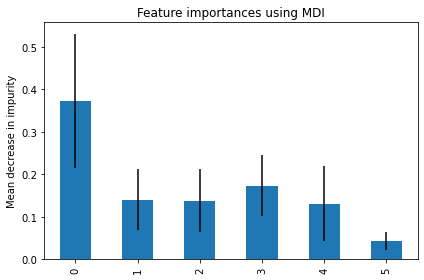

In [85]:
#Selecting features 
importances = Fmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in Fmodel.estimators_], axis=0)
forest_importances = pd.Series(importances, index=range(0,6))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [89]:
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,-0.930087,-0.730571,-0.730571,-0.713961,-0.803969,0.976324
1,0.058542,0.286256,0.286256,-0.096667,1.393378,1.638100
2,-0.146084,0.135424,0.135424,0.016143,1.178362,-0.535140
3,0.071084,0.795596,0.795596,0.137462,1.669292,0.698541
4,-0.282982,-0.167007,-0.167007,0.043373,1.115669,0.747562
...,...,...,...,...,...,...
279,2.347853,-0.441320,-0.441320,-0.414674,-0.297040,-0.616841
280,0.376484,0.971942,0.971942,0.235684,1.998918,-1.123385
281,-0.930087,-0.730565,-0.730565,-0.713961,-0.803969,1.180576
282,-0.930087,-0.730562,-0.730562,-0.713961,-0.803969,0.502460


In [92]:
y_train

,label
109,vpn2
180,vpn2
193,vpn2
157,vpn2
181,vpn2
...,...
71,vpn1
106,vpn2
270,vpn3
348,vpn3


In [93]:
#working with xgboost 
import xgboost as xgb

lab = LabelBinarizer()
ny_train = lab.fit_transform(y_train)

dtrain = xgb.DMatrix(data=X_train, label=ny_train)
num_parallel_tree = 4
num_boost_round = 16
# total number of built trees is num_parallel_tree * num_classes * num_boost_round

# We build a boosted random forest for classification here.
modelx = xgb.XGBClassifier(nthread=4,seed=42)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

CV_rfc = GridSearchCV(estimator=modelx, param_grid=parameters, cv= 3,verbose=True)
CV_rfc.fit(X_train, ny_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [97]:
#train the new model
CV_rfc.best_params_

modelx = xgb.XGBClassifier(learning_rate=0.1, max_depth= 9, n_estimators= 140,nthread=4,
    seed=42)
modelx.fit(X_train, ny_train)
ny_test = lab.fit_transform(y_test)
expected_y  = ny_test
predicted_y = modelx.predict(X_test)

print(f'the accuracy of the model on the training set is {modelx.score(X_train, ny_train)}')
print(f'the accuracy of the model on the validation set is {modelx.score(X_test, ny_test)}')

the accuracy of the model on the training set is 0.9929577464788732
the accuracy of the model on the validation set is 0.7928571428571428


In [126]:
#Adding features
from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(degree=3)
data_train = trans.fit_transform(X_train)
data_test = trans.transform(X_test)
data_train = pd.DataFrame(data_train)

In [129]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [500,600,550],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,9,10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(data_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500, 600, 550]})

In [127]:
Fmodel.fit(data_train,y_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=600,
                       random_state=0)

In [128]:
print(f'the accuracy of the model on the training set is {Fmodel.score(data_train, y_train)}')
print(f'the accuracy of the model on the validation set is {Fmodel.score(data_test, y_test)}')

the accuracy of the model on the training set is 0.9929577464788732
the accuracy of the model on the validation set is 0.8571428571428571


In [116]:
data = trans.fit_transform(X_transformed)
Fmodel.fit(data,y.values.ravel())


RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=600,
                       random_state=0)

In [117]:
data_valid = trans.transform(X_test_transformed)

In [118]:
data_predicted = Fmodel.predict(data_valid)

In [119]:
data_predicted

array(['vpn3', 'vpn3', 'vpn2', 'vpn3', 'vpn3', 'vpn3', 'vpn1', 'vpn2',
       'vpn1', 'vpn1', 'vpn1', 'vpn2', 'vpn3', 'vpn2', 'vpn2', 'vpn2',
       'vpn3', 'vpn2', 'vpn2', 'vpn2', 'vpn1', 'vpn3', 'vpn2', 'vpn1',
       'vpn3', 'vpn3', 'vpn1', 'vpn2', 'vpn3', 'vpn1', 'vpn2', 'vpn2',
       'vpn1', 'vpn3', 'vpn2', 'vpn3', 'vpn2', 'vpn2', 'vpn2', 'vpn3',
       'vpn2', 'vpn1', 'vpn3', 'vpn2', 'vpn3', 'vpn3'], dtype=object)

In [125]:
sub2 = pd.DataFrame(data={'id': ids, 'label': data_predicted}).set_index("id")
#sub.to_csv('submit5.csv')
sub2 == sub

,label
id,
dDFFVPfE2raEkywM2otm5m,True
cQasTHCdJxN2k999SmZFyF,True
QZWxzWAgoDsWWfwmdbG6Qo,True
VQEd7BBHVq9Y9M7FbTTXTy,True
SsefgHb8JYUZfXACrsEpAu,True
FdYrQ2exX74vsDKLUTU3g6,True
catuuPzj9j4og6M9z5tswo,True
EUycNJ9wjk4KEBvziDppbc,True
TqpBJxcqGj4aTjcYdVpux9,True
